-- TASK 1: DATA PREPARATION AND CUSTOMER ANALYTICS

DATA PROCESSING

In [300]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta

In [302]:
transaction = pd.read_excel(r"D:\DATA ANALYST\Quantium Project\QVI_transaction_data.xlsx")

In [303]:
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [304]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [305]:
puchase_behavioủr = pd.read_csv(r"D:\DATA ANALYST\Quantium Project\QVI_purchase_behaviour.csv")

In [306]:
puchase_behavioủr.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [307]:
puchase_behavioủr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [308]:
#  Join 2 dataset
customer_segment = transaction.merge(puchase_behavioủr,on= 'LYLTY_CARD_NBR', how = 'left')

In [309]:
customer_segment

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [310]:
# Change columns name
col = ['Date','Store_Number','Loyal_ID','Transaction_ID','Product_ID','Product_Name','Product_Quantity','Total_Sales','Life_Stage','Premium_Customer']
customer_segment.columns= col

In [311]:
# Check data in columns 'Product_Name"
sorted(customer_segment['Product_Name'].unique())

['Burger Rings 220g',
 'CCs Nacho Cheese    175g',
 'CCs Original 175g',
 'CCs Tasty Cheese    175g',
 'Cheetos Chs & Bacon Balls 190g',
 'Cheetos Puffs 165g',
 'Cheezels Cheese 330g',
 'Cheezels Cheese Box 125g',
 'Cobs Popd Sea Salt  Chips 110g',
 'Cobs Popd Sour Crm  &Chives Chips 110g',
 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
 'Dorito Corn Chp     Supreme 380g',
 'Doritos Cheese      Supreme 330g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Doritos Corn Chips  Cheese Supreme 170g',
 'Doritos Corn Chips  Nacho Cheese 170g',
 'Doritos Corn Chips  Original 170g',
 'Doritos Mexicana    170g',
 'Doritos Salsa       Medium 300g',
 'Doritos Salsa Mild  300g',
 'French Fries Potato Chips 175g',
 'Grain Waves         Sweet Chilli 210g',
 'Grain Waves Sour    Cream&Chives 210G',
 'GrnWves Plus Btroot & Chilli Jam 180g',
 'Infuzions BBQ Rib   Prawn Crackers 110g',
 'Infuzions Mango     Chutny Papadums 70g',
 'Infuzions SourCream&Herbs Veg St

In [312]:
# Replace worth brand_name
customer_segment['Product_Name'] = customer_segment['Product_Name'].replace(
    {
        'Infzns Crn Crnchers Tangy Gcamole': 'Infuzions Corn Crunchers Tangy Guacamole',
        'Infzns Corn Cornchers Tangy Gcamole 110g':'Infuzions Corn Crunchers Tangy Guacamole 110g',
        'Dorito Corn Chp     Supreme 380g': 'Doritos Corn Chip   Supreme 380g',
        'Dorito Corn Chipss     Supreme 380g': 'Doritos Corn Chipss     Supreme 380g',
        'GrnWves Plus Btroot & Chilli Jam 180g': 'Grain Waves Plus Btroot & Chilli Jam 180g',
        'Snbts Whlgrn Crisps Cheddr&Mstrd 90g': 'Sunbites Wholegrain Crisps Cheddar & Mustard 90g',
        'Smith Crinkle Cut   Mac N Cheese 150g': 'Smiths Crinkle Cut Mac N Cheese 150g',
        'Smith Crinkle Cut   Bolognese 150g': 'Smiths Crinkle Cut   Bolognese 150g',
        'Infzns Corn Cornchers Tangy Gcamole 110g':'Infuzions Corn Crunchers Guacamole 110g'
    },
    regex=True
)


In [313]:
#  Replace worth words
def replaceWords(string):
    # specific
    string = re.sub(r"SeaSalt", "Sea Salt", string)
    string = re.sub(r"Frch/Onin", "French Onion", string)
    string = re.sub(r"Cheddr Mstrd", "Cheddar Mustard", string)
    string = re.sub(r"Jlpno Chili", "Jalapeno Chilli", string)
    string = re.sub(r"Swt/Chlli Sr/Cream", "Sweet Chilli Sour Cream", string)
    string = re.sub(r"SourCream", "Sour Cream", string)
    string = re.sub(r"Tmato Hrb Spce", "Tomato Herb Spice", string)
    string = re.sub(r"S/Cream", "Sour Cream", string)
    string = re.sub(r"ChipsFeta", "Chips Feta", string)
    string = re.sub(r"ChpsHny", "Chips Honey", string)
    string = re.sub(r"FriedChicken", "Fried Chicken", string)
    string = re.sub(r"OnionDip", "Onion Dip", string)
    string = re.sub(r"SweetChili", "Sweet Chilli", string)
    string = re.sub(r"PotatoMix", "Potato Mix", string)
    string = re.sub(r"Seasonedchicken", "Seasoned Chicken", string)
    string = re.sub(r"CutSalt/Vinegr", "Cut Salt Vinegar", string)
    string = re.sub(r"ChpsBtroot", "Chips Beetroot", string)
    string = re.sub(r"ChipsBeetroot", "Chips Beetroot", string)
    string = re.sub(r"ChpsFeta", "Chips Feta", string)
    string = re.sub(r"OnionStacked", "Onion Stacked", string)
    string = re.sub(r"Ched", "Cheddar", string)
    string = re.sub(r"Strws", "Straws", string)
    string = re.sub(r"Slt", "Salt", string)
    string = re.sub(r"Chikn", "Chicken", string)
    string = re.sub(r"Rst", "Roast", string)
    string = re.sub(r"Vinegr", "Vinegar", string)
    string = re.sub(r"Mzzrlla", "Mozzarella", string)
    string = re.sub(r"Originl", "Original", string)
    string = re.sub(r"saltd", "Salted", string)
    string = re.sub(r"Swt", "Sweet", string)
    string = re.sub(r"Chli", "Chilli", string)
    string = re.sub(r"Hony", "Honey", string)
    string = re.sub(r"Chckn", "Chicken", string)
    string = re.sub(r"Chp", "Chips", string)
    string = re.sub(r"Chip", "Chips", string)
    string = re.sub(r"Btroot", "Beetroot", string)
    string = re.sub(r"Chs", "Cheese", string)
    string = re.sub(r"Crm", "Cream", string)
    string = re.sub(r"Orgnl", "Original", string)
    string = re.sub(r"Swt ChliS/Cream", "Sweet Chilli Sour Cream", string)
    string = re.sub(r"SnagSauce", "Snag Sauce", string)
    string = re.sub(r"Compny", "Company", string)
    string = re.sub(r"HoneyJalapeno", "Honey Jalapeno", string)
    string = re.sub(r"Sweetspcy", "Sweet Spicy", string)
    string = re.sub(r"BeetrootRicotta", "Beetroot Ricotta", string)
    string = re.sub(r"Crn", "Corn", string)
    string = re.sub(r"Crnchers", "Crunchers", string)
    string = re.sub(r"CreamHerbs", "CreamHerbs", string)
    string = re.sub(r"Tmato", "Tomato", string)
    string = re.sub(r"BBQMaple", "Berbeque Maple", string)
    string = re.sub(r"BBQ", "Berbeque", string)
    string = re.sub(r"Sthrn", "Southern", string)
   
    return string
customer_segment['Product_Name'] = [replaceWords(s) for s in customer_segment['Product_Name']]



In [314]:
# Recheck Data
sorted(customer_segment['Product_Name'].unique())

['Burger Rings 220g',
 'CCs Nacho Cheese    175g',
 'CCs Original 175g',
 'CCs Tasty Cheese    175g',
 'Cheetos Cheese & Bacon Balls 190g',
 'Cheetos Puffs 165g',
 'Cheezels Cheese 330g',
 'Cheezels Cheese Box 125g',
 'Cobs Popd Sea Salt  Chipss 110g',
 'Cobs Popd Sour Cream  &Chives Chipss 110g',
 'Cobs Popd Sweet/Chlli &Sr/Cream Chipss 110g',
 'Doritos Cheese      Supreme 330g',
 'Doritos Corn Chips   Supreme 380g',
 'Doritos Corn Chips Mexican Jalapeno 150g',
 'Doritos Corn Chips Southern Chicken 150g',
 'Doritos Corn Chipss  Cheese Supreme 170g',
 'Doritos Corn Chipss  Nacho Cheese 170g',
 'Doritos Corn Chipss  Original 170g',
 'Doritos Mexicana    170g',
 'Doritos Salsa       Medium 300g',
 'Doritos Salsa Mild  300g',
 'French Fries Potato Chipss 175g',
 'Grain Waves         Sweet Chilli 210g',
 'Grain Waves Plus Beetroot & Chilli Jam 180g',
 'Grain Waves Sour    Cream&Chives 210G',
 'Infuzions Berbeque Rib   Prawn Crackers 110g',
 'Infuzions Corn Crunchers Tangy Guacamole 110g',


In [315]:
# Danh sách các Brand_Name
brand_names = [
    'Burger Rings', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos', 'French Fries', 
    'Grain Waves', 'Infuzions', 'Kettle', 'NCC', 'Natural Chips', 'Old El Paso', 
    'Pringles', 'RRD', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins', 'Tostitos', 
    'Twisties', 'Tyrrells', 'WW', 'Woolworths'
]

# Hàm để tách Brand_Name, Product và Packet_Size
def extract_details(product_name):
    # Tìm Packet_Size sử dụng regex
    match = re.search(r'\d+(?:[A-Za-z]*|\s*)\d*g', product_name, re.IGNORECASE)
    if match:
        packet_size = match.group(0).strip()
        # Loại bỏ Packet_Size và dọn dẹp khoảng trắng
        name_part = re.sub(r'\s*\d+(?:[A-Za-z]*|\s*)\d*g', '', product_name).strip()
        
        # Tìm Brand_Name trong name_part
        for brand in brand_names:
            if name_part.startswith(brand):
                brand_name = brand
                product = name_part[len(brand):].strip()
                return pd.Series([brand_name, product, packet_size], index=['Brand_Name', 'Product', 'Packet_Size'])
        
        # Nếu không tìm thấy Brand_Name, sử dụng toàn bộ name_part là Brand_Name
        return pd.Series([name_part, '', packet_size], index=['Brand_Name', 'Product', 'Packet_Size'])
    else:
        # Nếu không tìm thấy Packet_Size, coi toàn bộ là Brand_Name
        return pd.Series([product_name.strip(), '', ''], index=['Brand_Name', 'Product', 'Packet_Size'])


# Áp dụng hàm để tạo các cột mới
customer_segment[['Brand_Name', 'Product', 'Packet_Size']] = customer_segment['Product_Name'].apply(extract_details)


In [316]:
sorted(customer_segment['Brand_Name'].unique())

['Burger Rings',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Doritos',
 'French Fries',
 'Grain Waves',
 'Infuzions',
 'Kettle',
 'NCC',
 'Natural Chips',
 'Old El Paso',
 'Pringles',
 'RRD',
 'Red Rock Deli',
 'Smiths',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'WW',
 'Woolworths']

In [317]:
base_date = datetime(1899, 12, 30)
def convert_to_date(days):
    return base_date + timedelta(days=days)

customer_segment['Date'] = customer_segment['Date'].apply(convert_to_date)

In [318]:
customer_segment['Packet_Size'] = customer_segment['Packet_Size'].str.replace('G', 'g')

In [319]:
customer_segment.head()

,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Name,Product_Quantity,Total_Sales,Life_Stage,Premium_Customer,Brand_Name,Product,Packet_Size
0,2018-10-17,1,1000,1,5,Natural Chips Company Sea Salt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chips,Company Sea Salt,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,Nacho Cheese,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chipss Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,Crinkle Cut Chipss Chicken,170g
3,2018-08-17,2,2373,974,69,Smiths Chips Thinly Sour Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,Chips Thinly Sour Cream&Onion,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chipss Honey&Jalapeno Chilli 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,Tortilla Chipss Honey&Jalapeno Chilli,150g


In [320]:
customer_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              264836 non-null  datetime64[ns]
 1   Store_Number      264836 non-null  int64         
 2   Loyal_ID          264836 non-null  int64         
 3   Transaction_ID    264836 non-null  int64         
 4   Product_ID        264836 non-null  int64         
 5   Product_Name      264836 non-null  object        
 6   Product_Quantity  264836 non-null  int64         
 7   Total_Sales       264836 non-null  float64       
 8   Life_Stage        264836 non-null  object        
 9   Premium_Customer  264836 non-null  object        
 10  Brand_Name        264836 non-null  object        
 11  Product           264836 non-null  object        
 12  Packet_Size       264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memor

In [345]:
customer_segment.to_excel(r"D:\DATA ANALYST\Quantium Project\Final_Data.xlsx",index = False)

EXPLORATORY ANALYSIS

Total Sales and Quantity sold

In [255]:
# Toltal Revenue 
total_revenue = customer_segment['Total_Sales'].sum()
total_revenue

1934415.0000000002

In [257]:
# Total Quantity
total_qty = customer_segment['Product_Quantity'].sum()
total_qty

505124

In [259]:
# Revenue and quantity by month 
customer_segment['Year'] = customer_segment['Date'].dt.year
customer_segment['Month'] = customer_segment['Date'].dt.month
revenue_qty_by_month = customer_segment.groupby(['Year','Month'])[['Total_Sales','Product_Quantity']].sum().reset_index()
revenue_qty_by_month

,Year,Month,Total_Sales,Product_Quantity
0,2018,7,165275.30,43242
1,2018,8,158731.05,41484
2,2018,9,160522.00,41792
3,2018,10,164415.70,42821
4,2018,11,160233.70,41895
5,2018,12,167913.40,43845
6,2019,1,162642.30,42501
7,2019,2,150665.00,39220
8,2019,3,166265.20,43347
9,2019,4,159845.10,41825


In [261]:
# Revenue and quantity by quarter
revenue_qty_by_quarter = revenue_qty_by_month.copy()
def get_quarter(month):
    if month in [7, 8, 9]:
        return 'Q1'
    elif month in [10, 11, 12]:
        return 'Q2'
    elif month in [1, 2, 3]:
        return 'Q3'
    elif month in [4, 5, 6]:
        return 'Q4'
revenue_qty_by_quarter['Quarter'] = revenue_qty_by_quarter['Month'].apply(get_quarter)
sum_mean_revenue_qty_quarter = revenue_qty_by_quarter.groupby('Quarter').agg(
        revenue=('Total_Sales', 'sum'),
        mean_revenue=('Total_Sales', 'mean'),
        total_qty=('Product_Quantity', 'sum')
    ).sort_values(by='Quarter', ascending=True).reset_index()
sum_mean_revenue_qty_quarter

,Quarter,revenue,mean_revenue,total_qty
0,Q1,484528.35,161509.45,126518
1,Q2,492562.80,164187.60,128561
2,Q3,479572.50,159857.50,125068
3,Q4,477751.35,159250.45,124977


In [263]:
# Qúy 1 và 2 có doanh thu cao hơn so với 2 quý còn lại, đặc biệt là quý 2 thời gian cuối năm

In [265]:
month_percent = revenue_qty_by_month['Total_Sales']/total_revenue
quarter_percent = sum_mean_revenue_qty_quarter['revenue']/total_revenue
quarter_percent = pd.DataFrame(quarter_percent)
quarter_percent

,revenue
0,0.250478
1,0.254631
2,0.247916
3,0.246975


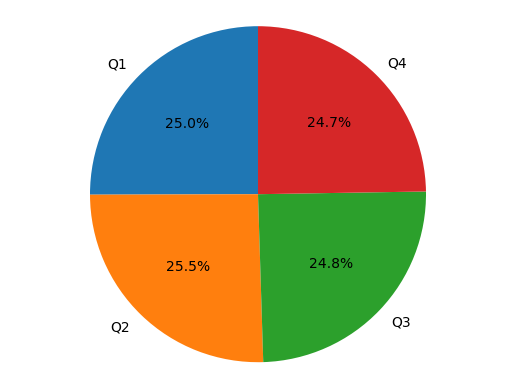

In [267]:
# Chuẩn bị dữ liệu từ sum_mean_revenue_qty_quarter
labels = sum_mean_revenue_qty_quarter['Quarter']  
sizes = sum_mean_revenue_qty_quarter['total_qty']  
fig, ax = plt.subplots()
# Vẽ biểu đồ hình tròn (pie)
ax.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
ax.axis('equal')
plt.show()


Revenue by Brand Name and Store

In [270]:
def sum_mean_revenue_qty(*columns):
    sum_mean_revenue_qty = customer_segment.groupby(list(columns)).agg(
        revenue=('Total_Sales', 'sum'),
        mean_revenue=('Total_Sales', 'mean'),
        total_qty=('Product_Quantity', 'sum')
    ).sort_values(by='revenue', ascending=False).reset_index()

    return sum_mean_revenue_qty

In [272]:
brand_rev_qty = sum_mean_revenue_qty('Brand_Name')
brand_rev_qty
# Doanh thu, doanh thu trung bình cho mỗi đơn hàng và tổng số lượng sản phẩm bán của các Brand Name

,Brand_Name,revenue,mean_revenue,total_qty
0,Kettle,390239.8,9.451652,79051
1,Doritos,241890.9,8.593843,54216
2,Smiths,224660.2,7.059680,60339
3,Pringles,177655.5,7.077344,48019
4,Infuzions,99047.6,6.974692,27119
5,Old El Paso,90785.1,9.736712,17805
6,Thins,88852.5,6.312789,26929
7,Twisties,81522.1,8.623027,18118
8,Tostitos,79789.6,8.424623,18134
9,Cobs,70569.8,7.280491,18571


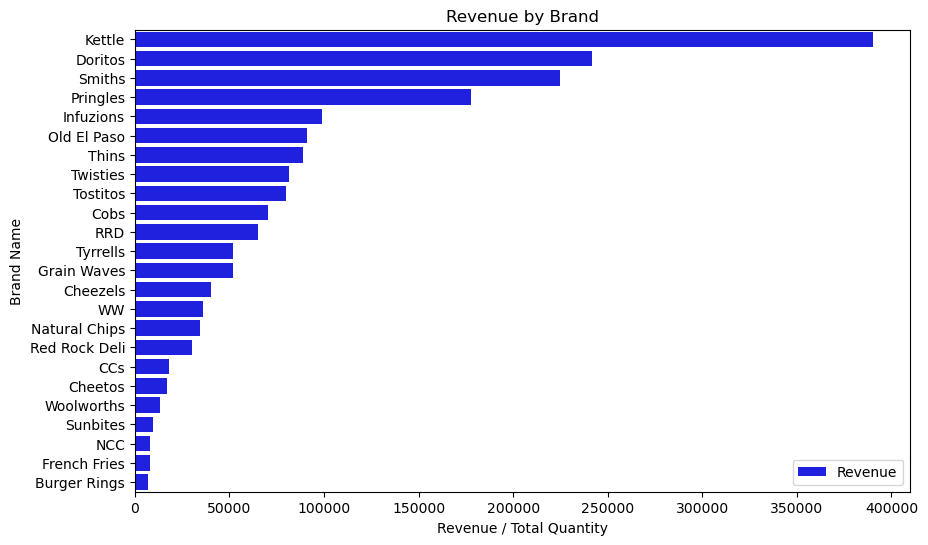

In [274]:
# Thiết lập figure
fig, ax = plt.subplots(figsize=(10, 6))
# Tạo biểu đồ cột cho 'revenue'
sns.barplot(x='revenue', y='Brand_Name', data=brand_rev_qty, color='b', label='Revenue', ax=ax)
# Thiết lập nhãn và tiêu đề
ax.set_xlabel('Revenue / Total Quantity')
ax.set_ylabel('Brand Name')
ax.set_title('Revenue by Brand')
ax.legend()

In [276]:
# Top 10 highest revenue tore
sum_mean_revenue_qty('Store_Number').iloc[0:10,:]

,Store_Number,revenue,mean_revenue,total_qty
0,226,18905.45,9.349876,4401
1,88,16333.25,8.720368,3718
2,165,15973.75,8.781611,3602
3,40,15559.50,8.820578,3499
4,237,15539.50,8.705602,3515
5,58,15251.45,8.750115,3463
6,199,14797.00,8.771191,3343
7,4,14647.65,8.729231,3316
8,203,14551.60,8.760747,3287
9,26,14469.30,8.822744,3256


In [278]:
sum_mean_revenue_qty('Loyal_ID').iloc[0:10,:]
# Những khách hàng trung thành của chuỗi tạp hóa
# Xem xét khách hàng có Loyal_ID : 226000 có thể là nhà phân phối nhỏ hơn

,Loyal_ID,revenue,mean_revenue,total_qty
0,226000,1300.00,650.000000,400
1,230078,138.60,8.152941,36
2,63197,132.80,8.853333,32
3,259009,127.20,8.480000,30
4,162039,126.80,7.044444,36
5,58361,124.80,8.914286,28
6,230154,124.40,8.885714,32
7,94185,122.80,7.675000,32
8,130090,122.65,8.760714,27
9,179228,120.80,7.550000,32


Customer Segment

Text(0, 0.5, 'Customer Class')

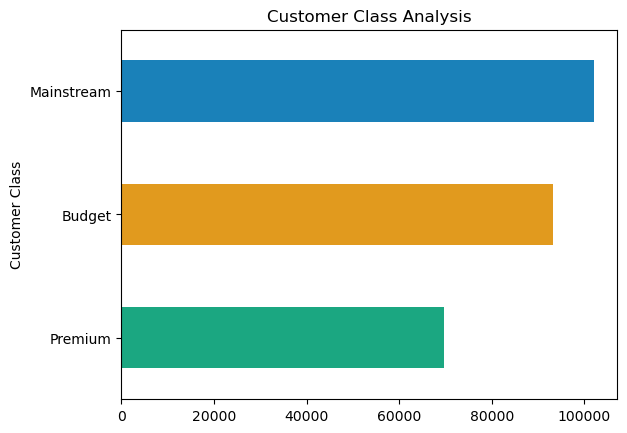

In [281]:
customer_segment.Premium_Customer.value_counts().plot(kind='barh', alpha=.9, color=sns.color_palette("colorblind"),title='Customer Class Analysis').invert_yaxis()
plt.ylabel("Customer Class")

In [283]:
sum_mean_revenue_qty('Premium_Customer')

,Premium_Customer,revenue,mean_revenue,total_qty
0,Mainstream,750744.50,7.361106,193965
1,Budget,676211.55,7.258838,177898
2,Premium,507458.95,7.281556,133261


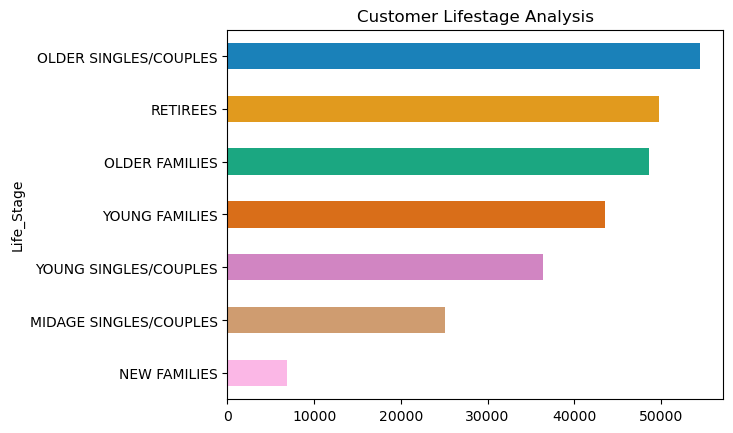

In [285]:
# Customer lifestage counts
customer_segment.Life_Stage.value_counts().plot(kind='barh', alpha=.9, color=sns.color_palette("colorblind"), title='Customer Lifestage Analysis').invert_yaxis()

In [287]:
sum_mean_revenue_qty('Life_Stage')
# The 'OLDER SINGLES/COUPES' customer groups tends to buy more chips and contributes the most revenue

,Life_Stage,revenue,mean_revenue,total_qty
0,OLDER SINGLES/COUPLES,402426.75,7.386823,104203
1,RETIREES,366470.90,7.364325,94166
2,OLDER FAMILIES,353767.20,7.279760,94992
3,YOUNG FAMILIES,316160.10,7.252709,84561
4,YOUNG SINGLES/COUPLES,260405.30,7.158515,66634
5,MIDAGE SINGLES/COUPLES,184751.30,7.357678,47721
6,NEW FAMILIES,50433.45,7.289124,12847


<Axes: ylabel='Life_Stage'>

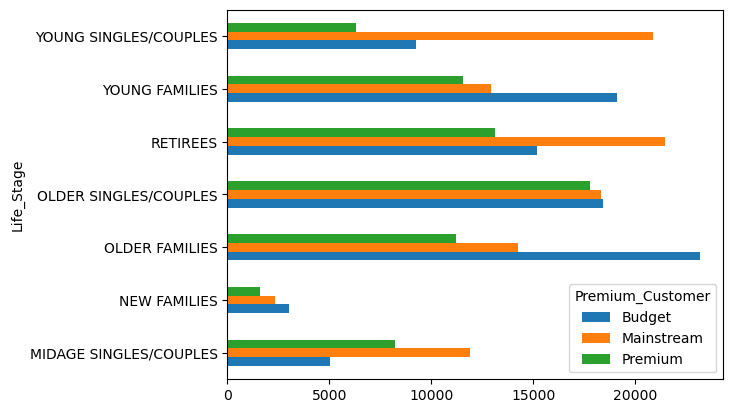

In [289]:
pd.pivot_table(customer_segment, values='Total_Sales', index=['Life_Stage'], columns=['Premium_Customer'], aggfunc=np.size).plot( kind='barh')

Packet_Size

In [296]:
size_revenue = sum_mean_revenue_qty('Packet_Size')
size_revenue

,Packet_Size,revenue,mean_revenue,total_qty
0,175g,485437.4,7.311905,126467
1,150g,304288.5,7.054984,82174
2,134g,177655.5,7.077344,48019
3,110g,162765.4,7.270532,42835
4,170g,146673.0,7.339889,38088
5,330g,136794.3,10.908636,23999
6,300g,113330.6,7.472676,28813
7,165g,101360.6,6.626175,29051
8,380g,76719.6,11.953817,12673
9,270g,55425.4,8.818679,12049


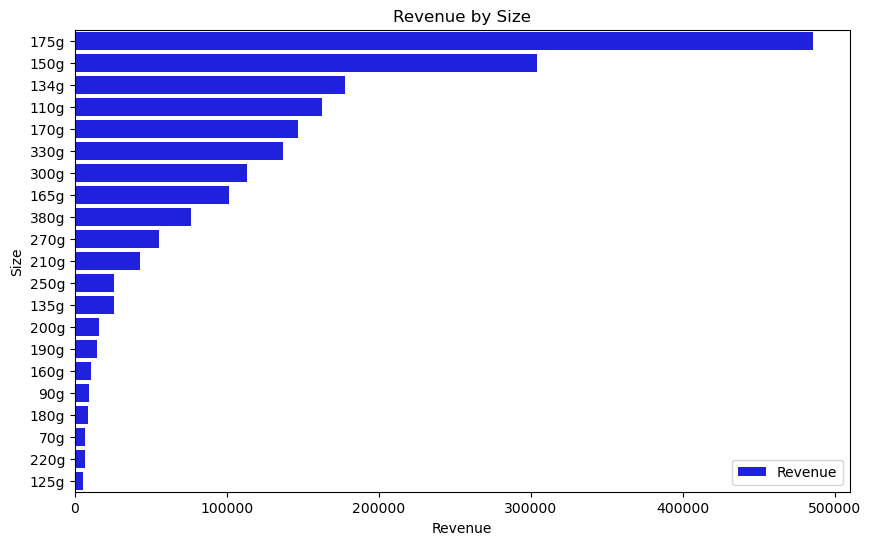

In [91]:
# Thiết lập figure
fig, ax = plt.subplots(figsize=(10, 6))

# Tạo biểu đồ cột cho 'revenue'
sns.barplot(x='revenue', y='Packet_Size', data=size_revenue, color='b', label='Revenue', ax=ax)

# Thiết lập nhãn và tiêu đề
ax.set_xlabel('Revenue')
ax.set_ylabel('Size')
ax.set_title('Revenue by Size')
ax.legend()

-- TASK 2: EXPERIMENTATION AND UPLIFT TESTING 

In [357]:
experimentation = pd.read_excel(r"D:\DATA ANALYST\Quantium Project\Final_Data.xlsx")

In [380]:
experimentation.loc[experimentation['Store_Number'].isin(['77', '86', '88'])]

,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Name,Product_Quantity,Total_Sales,Life_Stage,Premium_Customer,Brand_Name,Product,Packet_Size


In [358]:
experimentation.head()

,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Name,Product_Quantity,Total_Sales,Life_Stage,Premium_Customer,Brand_Name,Product,Packet_Size
0,2018-10-17,1,1000,1,5,Natural Chips Company Sea Salt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chips,Company Sea Salt,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,Nacho Cheese,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chipss Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,Crinkle Cut Chipss Chicken,170g
3,2018-08-17,2,2373,974,69,Smiths Chips Thinly Sour Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,Chips Thinly Sour Cream&Onion,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chipss Honey&Jalapeno Chilli 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,Tortilla Chipss Honey&Jalapeno Chilli,150g


In [388]:
experimentation.dtypes

Date                datetime64[ns]
Store_Number                 int64
Loyal_ID                     int64
Transaction_ID               int64
Product_ID                   int64
Product_Name                object
Product_Quantity             int64
Total_Sales                float64
Life_Stage                  object
Premium_Customer            object
Brand_Name                  object
Product                     object
Packet_Size                 object
dtype: object

In [404]:
# Using .isin() to filter rows
store_trail = experimentation.loc[experimentation['Store_Number'].isin([77,86,88])].sort_values(by='Store_Number').reset_index()
store_trail

,index,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Name,Product_Quantity,Total_Sales,Life_Stage,Premium_Customer,Brand_Name,Product,Packet_Size
0,263934,2018-11-07,77,77021,74934,96,WW Original Stacked Chipss 160g,2,3.8,YOUNG SINGLES/COUPLES,Premium,WW,Original Stacked Chipss,160g
1,175834,2019-05-22,77,77173,75101,62,Pringles Mystery Flavour 134g,1,3.7,RETIREES,Premium,Pringles,Mystery Flavour,134g
2,175833,2019-01-10,77,77173,75100,110,WW Original Corn Chipss 200g,2,3.8,RETIREES,Premium,WW,Original Corn Chipss,200g
3,175832,2018-10-21,77,77154,75081,79,Smiths Chips Thinly Cut Salt Vinegar175g,1,3.0,RETIREES,Premium,Smiths,Chips Thinly Cut Salt Vinegar,175g
4,175831,2019-02-03,77,77131,75056,56,Cheezels Cheese Box 125g,1,2.1,RETIREES,Premium,Cheezels,Cheese Box,125g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,59973,2018-07-16,88,88100,86720,75,Cobs Popd Sea Salt Chipss 110g,2,7.6,OLDER FAMILIES,Mainstream,Cobs,Popd Sea Salt Chipss,110g
3970,59972,2019-04-25,88,88077,86591,20,Doritos Cheese Supreme 330g,2,11.4,OLDER FAMILIES,Mainstream,Doritos,Cheese Supreme,330g
3971,59971,2019-02-07,88,88077,86590,15,Twisties Cheese 270g,2,9.2,OLDER FAMILIES,Mainstream,Twisties,Cheese,270g
3972,59977,2018-08-06,88,88112,86787,51,Doritos Mexicana 170g,2,8.8,OLDER FAMILIES,Mainstream,Doritos,Mexicana,170g


In [384]:
experimentation['Store_Number'].unique()

array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
        33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
        60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
        88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
       115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
       152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
       175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
       208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
       235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
       262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
        18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
        46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
        69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
       100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 12